<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/PrediksiKorelasiRegresiUas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_excel('/content/drive/MyDrive/datasetuas.xlsx')

In [45]:
df

,ProductID,ProductName,Category,Rating(x),Sales(y),x.y,x2,y2
0,1,Headphones,Electronics,1.7,466,792.2,2.89,217156
1,2,Headphones,Electronics,2.3,1332,3063.6,5.29,1774224
2,3,Smartwatch,Electronics,1.8,252,453.6,3.24,63504
3,4,Smartphone,Electronics,3.4,1806,6140.4,11.56,3261636
4,5,Laptop,Electronics,1.8,1508,2714.4,3.24,2274064
...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,2.3,325,747.5,5.29,105625
996,997,Fleece Blanket,Blankets,3.2,1546,4947.2,10.24,2390116
997,998,Throw Blanket,Blankets,2.8,1295,3626.0,7.84,1677025
998,999,Weighted Blanket,Blankets,1.3,1962,2550.6,1.69,3849444


In [46]:
x = df5022['Rating(x)']
y = df5022['Sales(y)']

In [47]:
regr = linear_model.LinearRegression()
regr.fit(x.values.reshape(-1,1), y)

print('Nilai a (intercept) =', regr.intercept_)
print('Nilai b (coefficients) =', regr.coef_)

Nilai a (intercept) = 998.0681407681468
Nilai b (coefficients) = [4.286376]


In [48]:
new_rating = 4.5
print('Hasil prediksi penjualan dengan rating 4.5 = \n', regr.predict([[new_rating]]))

Hasil prediksi penjualan dengan rating 4.5 = 
 [1017.35683278]


In [49]:
#membuat data frame
df = pd.DataFrame(list(zip(x,y)), columns = ['Rating(x)', 'Sales(y)'])
df

,Rating(x),Sales(y)
0,1.7,466
1,2.3,1332
2,1.8,252
3,3.4,1806
4,1.8,1508
...,...,...
995,2.3,325
996,3.2,1546
997,2.8,1295
998,1.3,1962


In [50]:
df.describe()

,Rating(x),Sales(y)
count,1000.000000,1000.000000
mean,3.025600,1011.037000
std,1.151004,582.113466
min,1.000000,0.000000
25%,2.100000,502.000000
50%,3.100000,998.000000
75%,4.000000,1540.000000
max,5.000000,1997.000000


In [51]:
df.mean()

Rating(x)       3.0256
Sales(y)     1011.0370
dtype: float64

In [54]:
mean = np.mean(x)
mean

3.0256000000000003

In [53]:
x_mean = df['Rating(x)'] - df['Rating(x)'].mean()
print(x_mean)
y_mean = df['Sales(y)'] - df['Sales(y)'].mean()
print(y_mean)

0     -1.3256
1     -0.7256
2     -1.2256
3      0.3744
4     -1.2256
        ...  
995   -0.7256
996    0.1744
997   -0.2256
998   -1.7256
999   -1.0256
Name: Rating(x), Length: 1000, dtype: float64
0     -545.037
1      320.963
2     -759.037
3      794.963
4      496.963
        ...   
995   -686.037
996    534.963
997    283.963
998    950.963
999     77.963
Name: Sales(y), Length: 1000, dtype: float64


In [55]:
sum_ = np.sum(x_mean * y_mean)
sum_

5672.952799999996

In [56]:
sqrt_ = np.sqrt(np.sum(x_mean**2) * np.sum(y_mean**2))
sqrt_

669344.7216785612

In [57]:
correlation = sum_ / sqrt_
correlation

0.008475382887570321

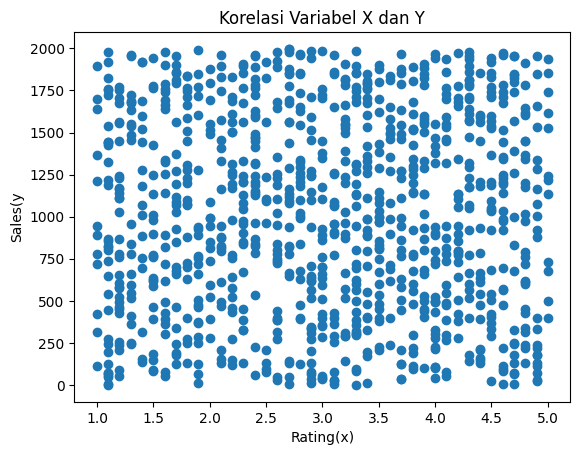

In [58]:
plt.title('Korelasi Variabel X dan Y')
plt.scatter(df5022['Rating(x)'] , df5022['Sales(y)'])
plt.xlabel('Rating(x)')
plt.ylabel('Sales(y')
plt.show()

In [59]:
np.corrcoef(df['Rating(x)'] , df['Sales(y)'])

array([[1.        , 0.00847538],
       [0.00847538, 1.        ]])

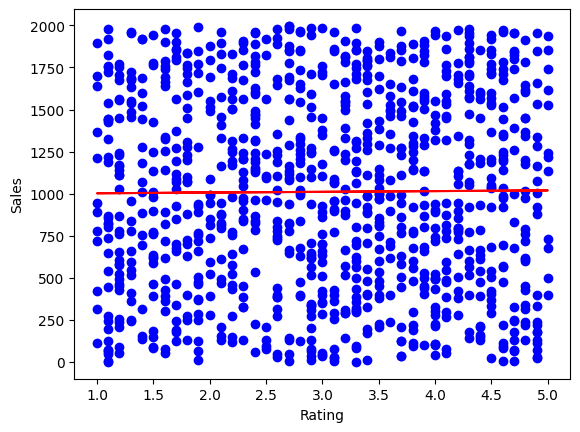

In [60]:
import matplotlib.pyplot as plt

plt.xlabel('Rating')
plt.ylabel('Sales')
plt.scatter(x,y, color='blue')
plt.plot(x, regr.predict(x.values.reshape(-1,1)), color='red')